In [ ]:
### some explanations
### function docs
### pep8? see style

In [139]:
import sys
print(sys.version)

3.5.2 (default, Nov 12 2018, 13:43:14) 
[GCC 5.4.0 20160609]


# 1. Least Common Multiple

### Prime Factors method

In [140]:
def primeFactors(a):
    """
    a
    """
    assert a > 0, "Number should be greater than 0"
    result = []
    factor = -1
    if a == 1:
        result.append(1)
    else:
        divs = list(range(2, a+1))
        i = 0
        while a%divs[i] != 0:
            i+=1
        factor = divs[i]
        result.append(factor)
        result += primeFactors(int(a/factor))
    return result 

In [141]:
primeFactors(351132)

[2, 2, 3, 29, 1009, 1]

In [142]:
def mcm(a,b):
    fa = primeFactors(a)
    fb = primeFactors(b)
    result = 1
    factors = list(set(fa + fb))
    for item in factors:
        # Using custom function
        itemsA = countItems(item,fa)
        itemsB = countItems(item,fb)
        result *= item ** (itemsA if itemsA > itemsB else itemsB)
    return result

# 2. Greatest Common Factor

In [143]:
def mcd(a,b):
    fa = primeFactors(a)
    fb = primeFactors(b)
    result = 1
    commons = list(set(fa).intersection(set(fb)))
    for item in commons:
        itemsA = fa.count(item)
        itemsB = fb.count(item)
        result *= item ** (itemsA if itemsA < itemsB else itemsB)
    return result

In [144]:
def countItems(item, itemList):
    result = 0
    for i in itemList:
        if i == item:
            result +=1
    return result
        

In [145]:
mcd(42, 56)

14

In [146]:
mcm(42, 56)

168

## Alternative to 1. and 2. using Euclidean method

In [147]:
def mcd(a, b):
    result = -1
    assert a > 0, "Numbers should be greater than 0"
    assert b > 0, "Numbers should be greater than 0"
    if b > a:
        a,b = b,a
    if b == 1:
        result = b
    else: 
        m = a % b
        result = b if m == 0 else mcd(b, m)
    return int(result)

def mcm(a,b):
    return int(a * b / mcd(a,b))

In [148]:
mcd(56, 42)

14

In [149]:
mcm(56, 42)

168

# 3. Pie Chart Matplotlib

In [150]:
import matplotlib.pyplot as plt

In [151]:
#Dummy function for random color
import random
r = lambda: random.randint(0,255)
getRandomColor = lambda: '#%02X%02X%02X' % (r(),r(),r())

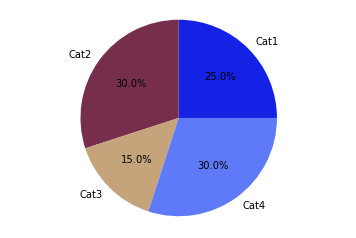

In [152]:
labels = ['Cat1', 'Cat2', 'Cat3', 'Cat4']
data = [25, 30, 15, 30]
colors = [getRandomColor() for x in range(5)]
fig1, ax1 = plt.subplots(1,1)
ax1.pie(data, labels=labels, autopct='%.1f%%', colors=colors)
ax1.axis('equal')  

plt.show()

# 4. Scatterplot

In [153]:
import numpy as np

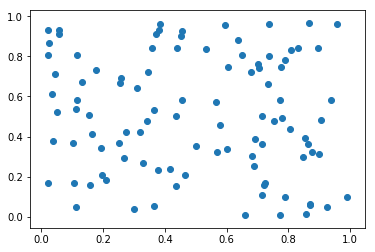

In [154]:
x = np.random.rand(100)
y = np.random.rand(100)
figScatter, ax1 = plt.subplots(1,1)
ax1.scatter(x,y)

In [155]:
### ToDO explain

# 5. Subplots

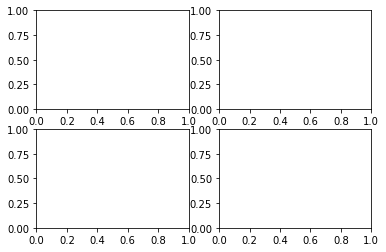

In [156]:
fig, (ax1, ax2) = plt.subplots(2,2)

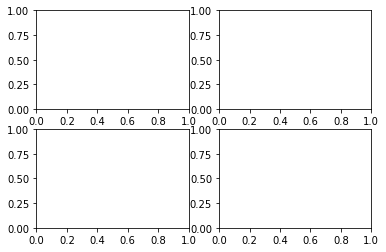

In [157]:
fig

In [158]:
ax2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9281b5cba8>,
      dtype=object)

In [159]:
ax1[0].scatter(x,y)

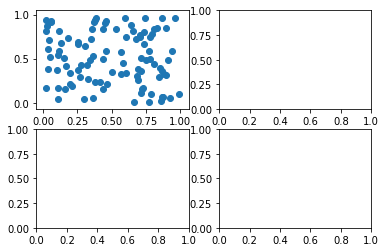

In [160]:
fig

In [161]:
ax2[1].pie(data, labels=labels, autopct='%.1f%%', colors=colors)

([<matplotlib.patches.Wedge at 0x7f9281ad0ac8>,
 [Text(0.777817,0.777817,'Cat1'),
  Text(-0.889919,0.646564,'Cat2'),
  Text(-0.777817,-0.777818,'Cat3'),
  Text(0.646564,-0.889919,'Cat4')],
 [Text(0.424264,0.424264,'25.0%'),
  Text(-0.48541,0.352671,'30.0%'),
  Text(-0.424264,-0.424264,'15.0%'),
  Text(0.352671,-0.48541,'30.0%')])

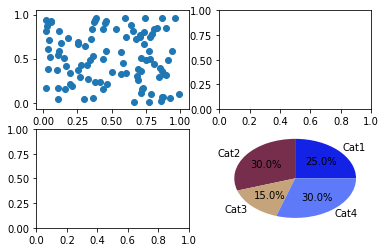

In [162]:
fig

In [163]:
dat = np.sin(range(0,10))
ax1[1].plot(dat)

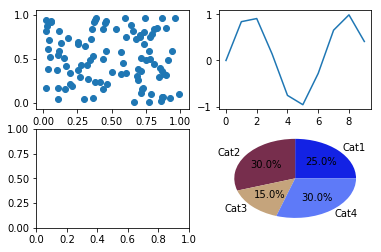

In [164]:
fig

In [165]:
f = lambda x: 2*x+1
linDat = range(0, 10)
linY = [f(x) for x in linDat ]
ax2[0].plot(linDat, linY)

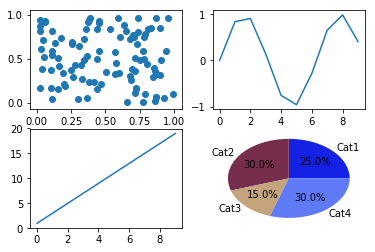

In [166]:
fig